In [1]:
from IPython.display import Image

# Introduction to the Fourier Transformation

signal <-> frequency transform : fourier transform

소리는 각자의 진동수와 파장을 갖는데, 여러 소리가 합쳐지면 단순히 각 소리들을 합한 것으로 생각할 수 있다.  

그런데 반대로 이미 합쳐진 파동에서 각각의 소리로 분해할 수도 있을까? 이것이 푸리에 변환의 출발점이다.

소리의 파동을 좌표 평면의 원점을 중심으로 회전시킨다고 해보자. 이때 1초에 몇 바퀴를 돌릴건지에 따라서 형태를 조절할 수 있다. 이때, 속도를 조절하다보면 파동이 모이는 상황이 나오는데, 푸리에 변환은 이 상황에서 각 소리의 주파수가 다르다는 점을 활용한다.  

즉, 원본 신호에서 주파수가 2Hz, 3Hz의 신호가 있었다고 하면, 각자의 신호를 원형을 중심으로 돌리는 어떤 **'기계'** 에 넣어서 시간을 조절하며 돌리다 보면 각자 2Hz와 3Hz에 해당하는 주파수에서 갑자기 하나의 하나의 형태를 띠게 된다.  

이 하나의 형태를 구분해보자는 것이다. 어떻게 구분할까? *3Blue1Brown*은 무게 중심의 x좌표를 활용한 예시를 보여주었다. 원본 파동에서 세기가 높은 지역은 원형으로 바꿨을 때도 높은 수치를 기록한다. 만약 시간을 조정하다가 감는 진동수와 신호 진동수가 일치하는 지점에서는 세기가 큰 지점은 모두 한쪽에, 세기가 약한 지점은 모두 반대쪽에 위치하면서 하나의 형태가 그려지는 것이라는 점을 고려하자. 그렇다면 무게 중심은 합쳐지는 지점에서 갑자기 큰 수치를 보일 것이다.

놀랍게도, 이건 하나의 신호 뿐만이 아니라 여러 개의 신호를 합친 경우에도 성립한다. 즉, 2Hz와 3Hz의 신호를 합친 새로운 신호(새로운 신호는 전혀 코사인이나 사인 형태를 띠고 있지 않은 곡선이다)를 **'기계'** 에 넣으면 무게 중심이 갑자기 커지는 지점이 2개가 나타난다. 즉, 원본 신호의 진동수에 대응되는 2개의 봉우리 값을 보이는 것이다.

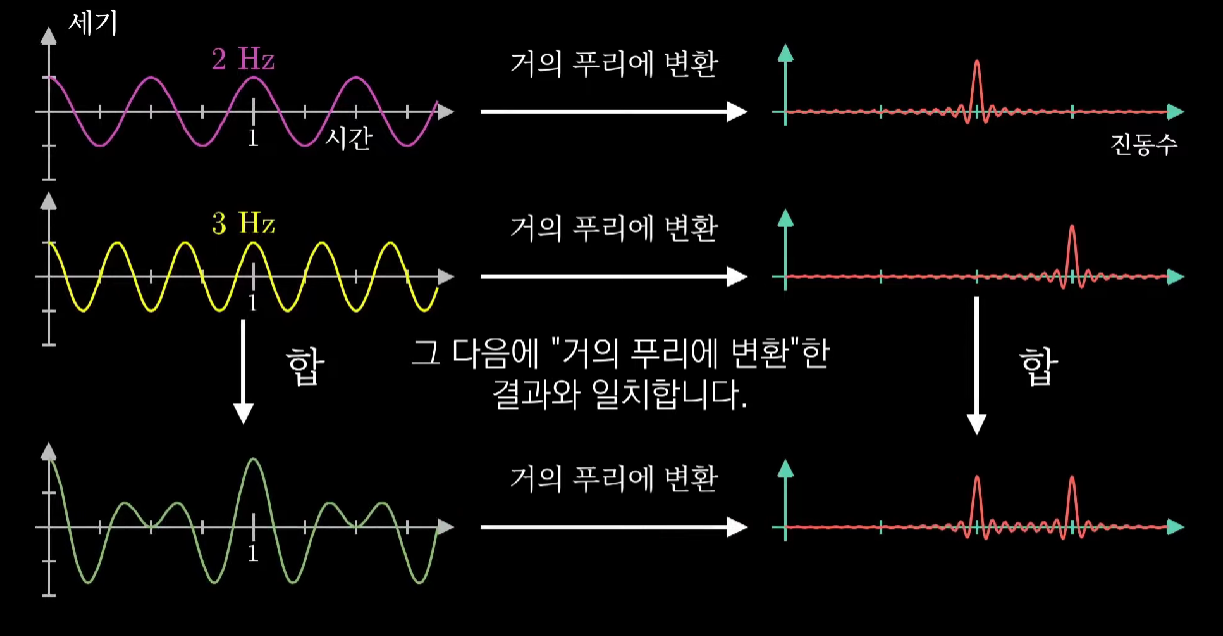

In [2]:
Image("C:/Users/jy990/Study/NLP/fourier1.1.PNG")

음성학에서는 이 방법을 어떻게 활용할까?  

만약 어떤 음악을 녹음했는데, 듣기 싫은 고음의 신호가 잡혔을 때 푸리에 변환을 해서 가장 높은 진동수를 갖는 봉우리가 있으면 그 봉우리를 편평하게 보정해주는 작업을 한다.

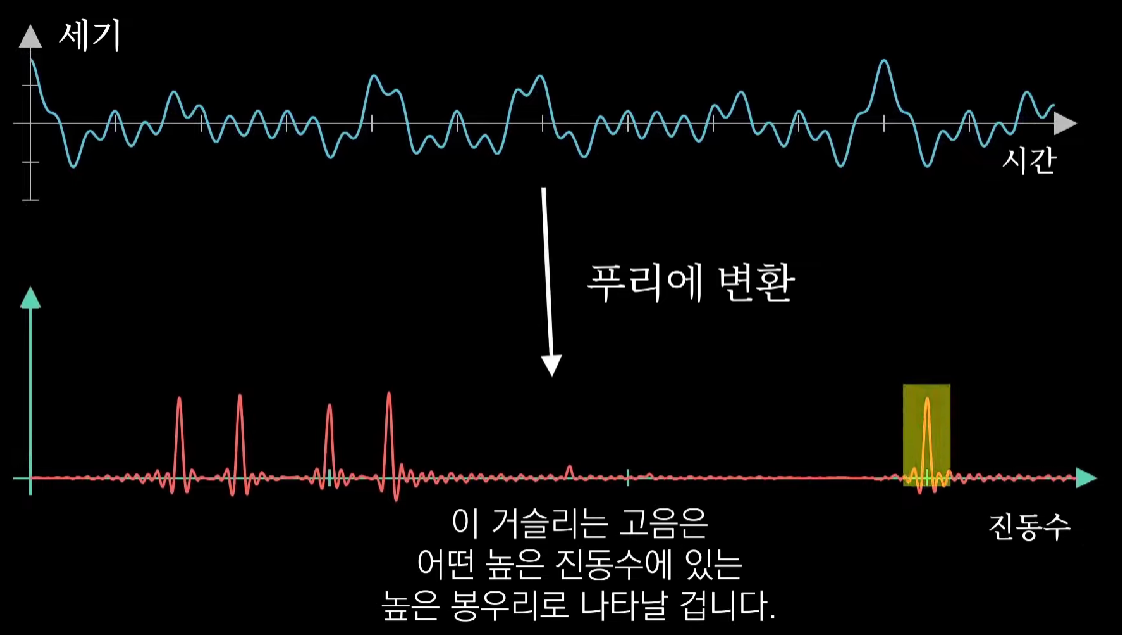

In [3]:
Image("C:/Users/jy990/Study/NLP/fourier1.2.PNG")

다행히도, *역 푸리에 변환* 이라는 방법이 존재한다. 즉, 푸리에 변환을 한 뒤에 진동수를 보정한 다음 다시 원래의 신호와 유사하게 다시 바꿀 수 있다는 말이다.

다시 돌아와서, 지금까지는 무게중심을 x좌표로 잡았지만 실제로는 그렇지 않다. 대신 좌표 평면을 복소 평면으로 가정하고(복소수는 회전과 변환이 더 자유롭기 때문이다), 오일러 공식을 활용한다.  

오일러 공식에 따르면 $exp(2\pi*i*t)$로 복소 평면의 회전을 표현할 수 있다. 여기서 $2\pi$는 단위원의 길이를, t는 시간을 나타낸다. 푸리에 변환에서는 진동수라는 개념을 함께 보고자 하기 때문에, $exp(2\pi*i*f*t)$를 사용하며, 여기서 f는 진동수에 대응되는 값이다. 만약 f가 $1/10$이면, 이 벡터는 10초에 원을 한 바퀴 돌게 된다. t가 10까지 증가해야 한바퀴를 돌게 되기 때문이다.

여기에, 일반적으로 푸리에 변환은 시계 반대방향으로 돌아가기 때문에 시계 방향으로 돌려주기 위해서 (-)를 곱해주자. 그 외엔 별 의미 없다.  

그리고 코사인 또는 사인 함수로 이루어진 원본 신호를 $g(t)$라고 하면, $g(t)exp(2\pi i f t)$는 원본 신호의 세기에 근거해 감겨나가며 그래프를 그리게 된다.  

이런 방식으로 원본 신호의 진동수 f를 기준 변수로 삼아서 그래프를 원으로 감는 행위를 단 하나의 수식으로 표현할 수 있다.

이제 이걸 활용해 무게 중심을 계산해보자.  

별 거 없다. 그냥 원본 신호의 특정 시점에 일정 간격으로 점을 찍어서 그 점들의 평균을 계산하는 것이다. 점을 많이 찍으면 많이 찍을수록 더 정확해지는 건 당연하다. 따라서 적분을 활용한다.   

즉, $\frac{1}{t_2 - t_1}\int_{t_1}^{t_2} g(t)exp(-2\pi i f t) dt$로 무게 중심을 근사한다.  

다만, 실제로는 $t_2 - t_1$으로 나눠주지 않는다. 그러면 시간 간격을 길게 할수록 진동수의 차이를 확실하게 파악할 수 있다.  

즉, $g(\hat{f}) = \int_{t_1}^{t_2} g(t)e^{-2\pi i f t} dt$로 근사한다.